In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.__version__

'2.19.0'

## 신경망을 이용한 예측 : 회귀문제

### 주택 가격 예측

- 1970년 중반 보스턴 주택 가격 데이터셋
- 데이터 506개: 훈련 샘플-404개, 테스트 샘플-102개
- 14개 변수
  - CRIM : 자치시(town) 별 1인당 범죄율
  - ZN : 25,000 평방피트를 초과하는 거주지역의 비율
  - INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
  - CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
  - NOX : 10ppm 당 농축 일산화질소
  - RM :  주택 1가구당 평균 방의 개수
  - AGE : 1940년 이전에 건축된 소유주택의 비율
  - DIS : 5개의 보스턴 직업센터까지의 접근성 지수
  - RAD : 방사형 도로까지의 접근성 지수
  - TAX : 10,000 달러 당 재산세율
  - PTRATIO : 자치시(town)별 학생/교사 비율
  - B : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함
  - LSTAT : 모집단의 하위계층의 비율(%)
  - MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

### 데이터 로드

In [3]:
from tensorflow.keras.datasets import boston_housing

(train_X, train_y), (test_X, test_y) = boston_housing.load_data()

In [4]:
train_X.shape

(404, 13)

In [5]:
test_X.shape

(102, 13)

In [6]:
train_y[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

### 데이터 준비

- 데이터 표준화
  - 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 발생
  - 입력 데이터에 있는 각 특성을 평균은 0, 표준편차 1이 되도록 표준화함

In [7]:
train_X.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
train_X.std(axis=0)

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [9]:
#데이터 표준화
mean, std = train_X.mean(axis=0), train_X.std(axis=0)
train_X -= mean
train_X /= std
test_X -= mean
test_X /= std

In [10]:
train_X.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
       -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
        6.13920356e-16])

### 1) 신경망 모델 정의 및 컴파일

- 샘플 개수가 적으므로 64개 유닛을 가진 2개의 은닉층으로 네트워크 구성


- 모델 정의 및 컴파일을 위한 함수 생성 build_model()

In [11]:
from tensorflow.keras import models, layers

In [12]:
def build_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(train_X.shape[1], )))
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### 2) 모델 훈련 및 검증

**K-fold cross-validation을 사용**

In [13]:
k = 4
epochs=100
n_samples = train_X.shape[0] // k
scores= {'val_mse':[], 'val_mae':[]}
for i in range(k):
    print(f'{i+1} 폴드 #####')
    val_X, val_y = train_X[i*n_samples:(i+1)*n_samples], train_y[i*n_samples:(i+1)*n_samples]
    tr_x = np.concatenate([train_X[:i*n_samples], train_X[:(i+1)*n_samples]], axis=0)
    tr_y = np.concatenate([train_y[:i*n_samples], train_y[:(i+1)*n_samples]], axis=0)
    model = build_model()
    model.fit(tr_x, tr_y, epochs=epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_X, val_y, verbose=0)
    scores['val_mae'].append(val_mae)
    scores['val_mse'].append(val_mse)
    print(f'## {i+1}폴드 : mse = {val_mse:.4f} mae = {val_mae:.4f} ')

1 폴드 #####
## 1폴드 : mse = 2.4043 mae = 1.1964 
2 폴드 #####
## 2폴드 : mse = 3.2063 mae = 1.3902 
3 폴드 #####
## 3폴드 : mse = 6.8627 mae = 1.6819 
4 폴드 #####
## 4폴드 : mse = 6.1803 mae = 1.8436 


In [14]:
scores

{'val_mse': [2.404343366622925,
  3.206324577331543,
  6.8627028465271,
  6.1802978515625],
 'val_mae': [1.1963520050048828,
  1.3901972770690918,
  1.6818888187408447,
  1.8436182737350464]}

In [15]:
np.mean(scores['val_mae'])

np.float64(1.5280140936374664)

=> 평균 1566달러 차이남

- 각 폴드에서 검증 점수를 로그에 저장하기

  - epochs를 500으로 하여 다시 훈련하여 검증

In [16]:
k ,epochs,batch_size = 4,500,16
n_samples = train_X.shape[0] // k
scores = {'val_mse':[], 'val_mae':[]}
for i in range(k):
    print(f'{i+1} 폴드 #####')
    val_X, val_y = train_X[i*n_samples:(i+1)*n_samples], train_y[i*n_samples:(i+1)*n_samples]
    tr_x = np.concatenate([train_X[:i*n_samples], train_X[:(i+1)*n_samples]], axis=0)
    tr_y = np.concatenate([train_y[:i*n_samples], train_y[:(i+1)*n_samples]], axis=0)
    model = build_model()
    history = model.fit(tr_x, tr_y, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=[val_X, val_y])
    print(f'## {i+1}폴드')
    scores['val_mae'].append(history.history['val_mae'])
    scores['val_mse'].append(history.history['val_loss'])
    # print(f'## {i+1}폴드 : mse = {val_mse:.4f} mae = {val_mae:.4f} ')

1 폴드 #####
## 1폴드
2 폴드 #####
## 2폴드
3 폴드 #####
## 3폴드
4 폴드 #####
## 4폴드


In [17]:
all_mae = np.array(scores['val_mae'])
all_mae.shape

(4, 500)

In [18]:
avg_all_mae = all_mae.mean(axis=0)
avg_all_mae.shape

(500,)

In [19]:
import pandas as pd
maes_df = pd.DataFrame(all_mae)
maes_df.columns.name='Epochs'
maes_df.index.name='Fold'

In [20]:
maes_df = maes_df.T

In [21]:
maes_df['avg'] = maes_df.mean(axis=1)
maes_df.tail()

Fold,0,1,2,3,avg
Epochs,,,,,
495,0.500987,0.341785,0.984802,0.704280,0.632963
496,0.631969,0.636694,0.624764,0.452745,0.586543
497,0.462052,0.371528,0.656374,0.639954,0.532477
498,0.537634,0.558599,0.691036,0.732892,0.630040
499,0.319972,0.628864,0.943828,0.851825,0.686122


In [22]:
maes_df['avg_mae'] = maes_df.T.mean(axis=0)
maes_df.T.tail()

Epochs,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Fold,,,,,,,,,,,,,,,,,,,,,
1,17.974661,14.004359,9.245950,5.945758,4.875140,4.154002,3.744942,3.412843,3.186986,3.071604,...,0.362917,0.366598,0.515853,0.293147,0.538657,0.341785,0.636694,0.371528,0.558599,0.628864
2,16.474983,10.221530,5.756239,4.188388,3.712670,3.406853,3.090106,2.943613,2.821190,2.703588,...,0.823210,0.679112,0.614960,0.626778,0.629442,0.984802,0.624764,0.656374,0.691036,0.943828
3,16.123163,7.107130,4.815711,3.875221,3.603449,3.292938,3.041224,2.921013,3.157000,2.763767,...,1.078895,0.691397,0.734804,0.917856,1.158297,0.704280,0.452745,0.639954,0.732892,0.851825
avg,17.758187,12.710340,9.553804,7.807453,7.015640,6.289704,5.622858,5.077601,4.628761,4.124174,...,0.648246,0.599047,0.575121,0.592281,0.668178,0.632963,0.586543,0.532477,0.630040,0.686122
avg_mae,17.758187,12.710340,9.553804,7.807453,7.015640,6.289704,5.622858,5.077601,4.628761,4.124174,...,0.648246,0.599047,0.575121,0.592281,0.668178,0.632963,0.586543,0.532477,0.630040,0.686122


### 3) 모델 성능 시각화

- 모든 폴드에 대해 에포크별 MAE 평균점수

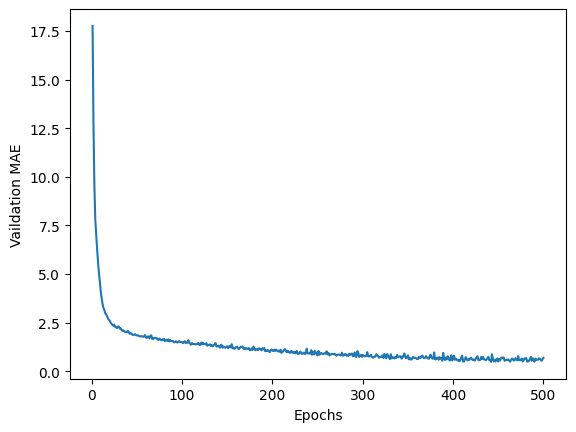

In [23]:
plt.plot(range(1,501), maes_df['avg'])
plt.xlabel('Epochs')
plt.ylabel('Vaildation MAE')
plt.show()

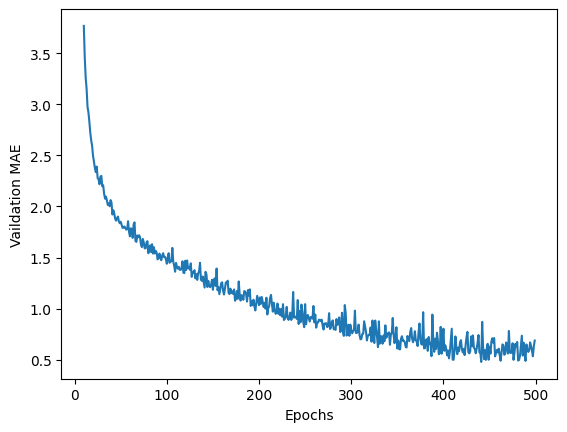

In [24]:
part_maes = maes_df['avg'][10:]
plt.plot(range(10,500), part_maes)
plt.xlabel('Epochs')
plt.ylabel('Vaildation MAE')
plt.show()

=> 검증 MAE가 120

In [37]:
X_val = train_X_vec[:10000]
X_tr = train_X_vec[10000:]
y_val = train_y_[:10000]
y_tr = train_y_[10000:]

NameError: name 'train_X_vec' is not defined

In [36]:
epochs, batch_size = 140,16
model = build_model()
# model.fit(train_X_vec, train_y_, epochs=20, batch_size=512, validation_split=0.3)
history = model.fit(X_tr, y_tr, epochs=20, batch_size=512, validation_data=[X_val, y_val],
                   verbose=1)

NameError: name 'X_tr' is not defined

In [27]:
test_mse, test_mae = model.evaluate(test_X, test_y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6257 - mae: 2.6148


In [28]:
pred = model.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


### 4) 최종 모델 훈련하기

- 에포크수, 은닉층의 크기 등 모델의 여러 매개변수에 대한 튜닝이 끝나면 모든 훈련데이터를 사용하여 모델을 훈련함

In [30]:
pred[:10]

array([[ 8.825642],
       [18.050587],
       [20.66811 ],
       [35.189777],
       [23.080452],
       [22.484123],
       [26.182615],
       [20.034569],
       [19.548805],
       [21.178999]], dtype=float32)

### 5) 테스트 데이터로 성능 확인

----

## [정리]

- 회귀는 분류에서 사용했던 것과 다른 손실함수 사용 : 평균제곱오차(MSE)
- 회귀에서 사용되는 평가지표 : 평균절대오차(MAE)
- 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일링해야 함 -> 정규화
- 가용한 데이터가 적다면 K-fold 교차검증을 사용하는 것이 신뢰할 수 있는 모델 평가방법임
- 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉층의 수를 줄임 모델이 좋음(일반적으로 1개 또는 2개)

### 연습문제.

1. 위 모델에서 최적화 알고리즘을 'rmsprop;을 사용한 경우 모델을 학습하고 평가하여 결과를 비교해보세요.


2. 학습의 epochs수와 batch사이즈를 조절하여 결과를 모델 성능을 비교하세요.


3. 2개의 은닉층과 1개의 출력층을 갖는 모델을 구성하여고 최적화는 'rmsprop'을 적용한 경우와 'adam'을 적용한 경우를 비교해보시오.


4. 위의 모델에서 콜백함수의 Early stopping 기법을 적용하여 최적의 epoch가 언제인지 찾아내시오.

---